In [1]:
import importlib
import os
from pathlib import Path
import sys

from arcgis.features import GeoAccessor, GeoSeriesAccessor
from arcgis.gis import GIS
from arcgis.learn import prepare_data
from dotenv import load_dotenv, find_dotenv
import pandas as pd

# import arcpy if available
if importlib.util.find_spec("arcpy") is not None:
    import arcpy

In [2]:
# paths to common data locations - NOTE: to convert any path to a raw string, simply use str(path_instance)
dir_prj = Path.cwd().parent

dir_data = dir_prj/'data'

dir_raw = dir_data/'raw'
dir_ext = dir_data/'external'
dir_int = dir_data/'interim'
dir_out = dir_data/'processed'

gdb_raw = dir_raw/'raw.gdb'
gdb_int = dir_int/'interim.gdb'
gdb_out = dir_out/'processed.gdb'

# import the project package from the project package path
sys.path.append(str(dir_prj/'src'))
import oil_pad

## Load Exported Data

In [3]:
train_dir = dir_raw/'training_data'
assert train_dir.exists()

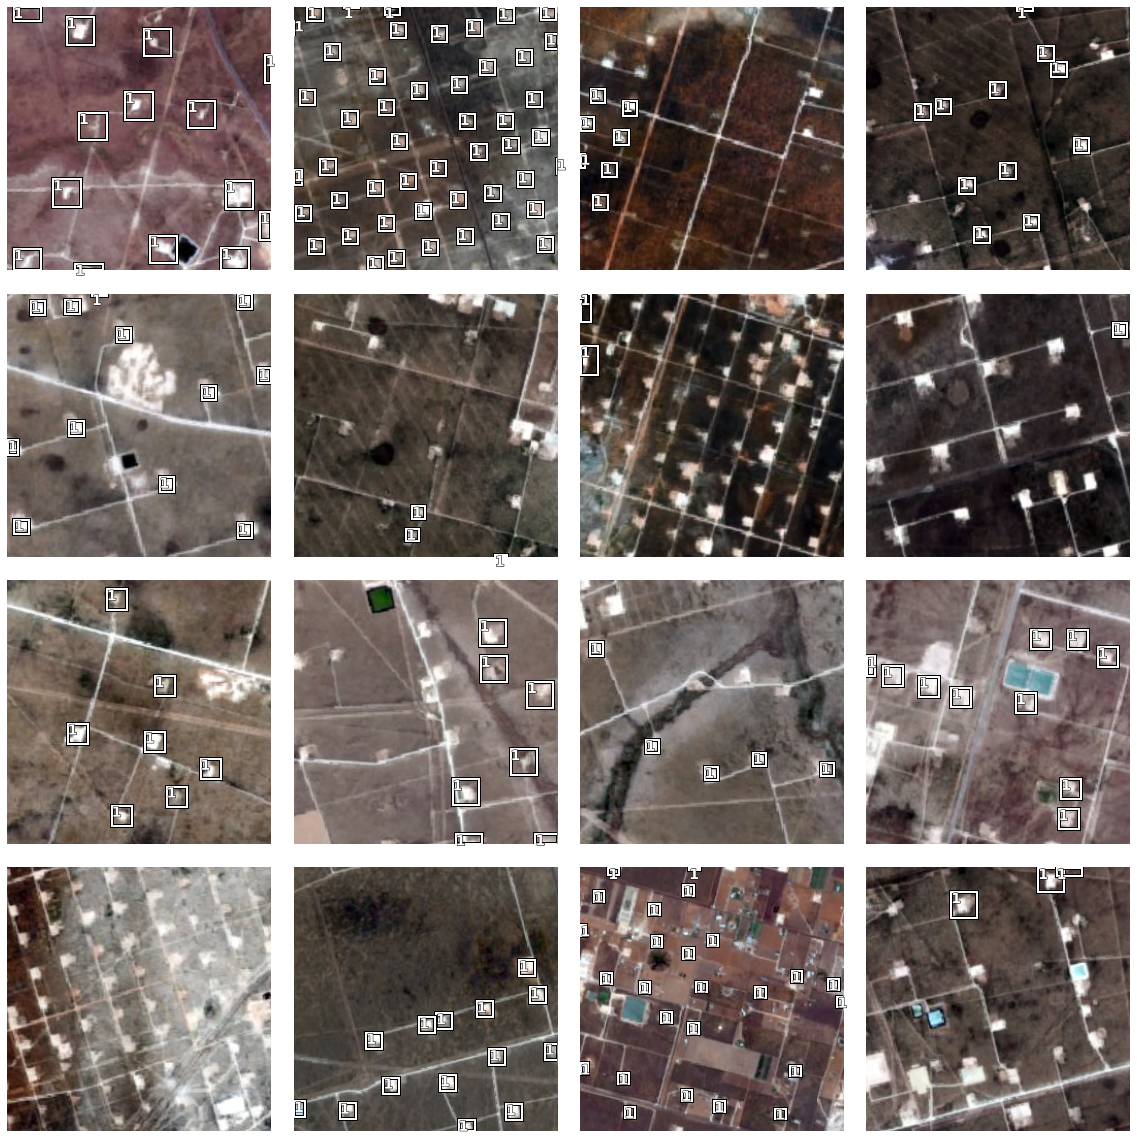

In [4]:
data_bunch = prepare_data(train_dir, chip_size=256, batch_size=16)
data_bunch.show_batch(rows=4)

## Train the Model

In [5]:
from arcgis.learn import UnetClassifier

In [6]:
mdl_unet = UnetClassifier(data_bunch)

In [7]:
mdl_unet.lr_find()

epoch,train_loss,valid_loss,accuracy,time


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


TypeError: __call__() takes 3 positional arguments but 4 were given